In [2]:
import math
import colorsys
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# FRACTAL INTERPOLATION FUNCTION
## data
x = [0,15, 30,45]
y = [0,20, 50 ,45]

X = [0]; Y=[0]

## vertical scaling factor
d = [0,0.5,0.5,0.5]

b = x[-1] - x[0]
a = []; c= []; e = []; ff = []

for n in range(1,4):
    aN = (x[n] - x[n-1])/b
    cN = ((y[n] - y[n-1])/b) - d[n]*((y[-1] - y[0])/b)
    eN = ((x[-1]*x[n-1])-(x[0]*x[n]))/b
    ffN = (x[-1]*y[n-1] - x[0]*y[n])/b - d[n]*((x[-1]*y[0] - x[0]*y[-1])/b)

    a.append(aN)
    c.append(cN)
    e.append(eN)
    ff.append(ffN)


for n in range(1,10000):
    k = randint(0,2)
    newX = a[k]*X[n-1] + e[k]
    newY = c[k]*X[n-1] +d[k+1]*Y[n-1] + ff[k]
    
    X.append(newX); Y.append(newY)


df = pd.DataFrame({"x": X,"y": Y})

df = df.sort_values(by = "x")
X1 =df.iloc[:,0].values
Y1 = df.iloc[:,1].values

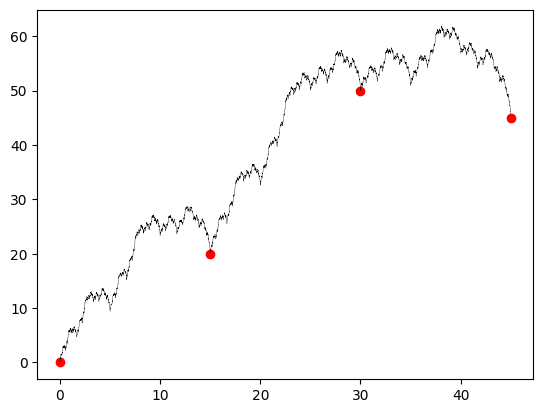

In [5]:
plt.plot(X1,Y1, c= "black", linewidth = 0.25)
plt.scatter(x,y, marker = "o", c = "red")
plt.show
plt.savefig('interpolant.pdf')

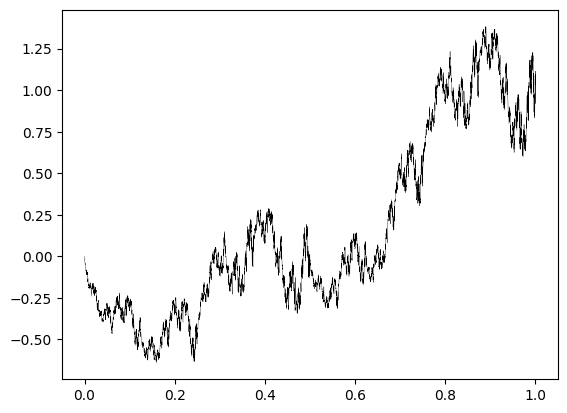

In [3]:


x = [0,1/4, 1/2,3/4,1]
y = [0,-1/2, 0 ,1/2,1]

X = [0]; Y=[0]

## vertical scaling factor
d = [0,0.4,-0.6,0.5,-0.7]

b = x[-1] - x[0]
a = []; c= []; e = []; ff = []

for n in range(1,5):
    aN = (x[n] - x[n-1])/b
    cN = ((y[n] - y[n-1])/b) - d[n]*((y[-1] - y[0])/b)
    eN = ((x[-1]*x[n-1])-(x[0]*x[n]))/b
    ffN = (x[-1]*y[n-1] - x[0]*y[n])/b - d[n]*((x[-1]*y[0] - x[0]*y[-1])/b)

    a.append(aN)
    c.append(cN)
    e.append(eN)
    ff.append(ffN)


for n in range(1,10000):
    k = randint(0,3)
    newX = a[k]*X[n-1] + e[k]
    newY = c[k]*X[n-1] +d[k+1]*Y[n-1] + ff[k]
    
    X.append(newX); Y.append(newY)


df = pd.DataFrame({"x": X,"y": Y})

df = df.sort_values(by = "x")
X1 =df.iloc[:,0].values
Y1 = df.iloc[:,1].values

plt.plot(X1,Y1, c= "black", linewidth = 0.25)
#plt.scatter(x,y, marker = "o", c = "red")
plt.show
plt.savefig('interpolant.pdf')


In [5]:
#HIDDEN VARIABLE FRACTAL INTERPOLATION FUNCTIONS
## data

x = [0, 30,60,100]
y = [0, 50 ,40,10]

## hidden variables (lots)

H = [0,30,60,100]
h = [0,0.5,0.2,0.3]
d =[0,-0.0,0.0,-0.0]
l = [0,-0.5,-0.1,-0.5]
m = [0,0.2,0.3,-0.1]

b = x[-1] - x[0]

a = [];c = []; ff = []; g = []
e = []; k = []

for n in range(1,4):

    p = y[n-1] - d[n]*y[0] - h[n]*H[0]
    q = H[n-1] - l[n]*y[0] - m[n]*H[0]
    r = y[n] - d[n]*y[-1] - h[n]*H[-1]
    s = H[n] - l[n]*y[-1] - m[n]*H[-1]

    aN = (x[n] - x[n-1])/b
    eN = ((x[-1]*x[n-1])-(x[0]*x[n]))/b
    cN = (r-p)/b; kN = (s-q)/b
    ffN = p - cN*x[0]; gN = q - kN*x[0]

    a.append(aN); c.append(cN)
    e.append(eN); k.append(kN)
    ff.append(ffN); g.append(gN)

X = [0]; Y=[0]; Z =[0]
    
for n in range(1,10000):
    r = randint(0,2)
    newX = a[r]*X[n-1] + e[r]
    newY = c[r]*X[n-1] +d[r+1]*Y[n-1] + h[r+1]*Z[n-1] + ff[r]
    newZ = k[r]*X[n-1] +l[r+1]*Y[n-1] + m[r+1]*Z[n-1] + g[r]
    
    X.append(newX); Y.append(newY); Z.append(newZ)


df = pd.DataFrame({"x": X,"y": Y,"z": Z})

df = df.sort_values(by = "x")
X1 =df.iloc[:,0].values
Y1 = df.iloc[:,1].values
Z1 = df.iloc[:,2].values

#print(ball)

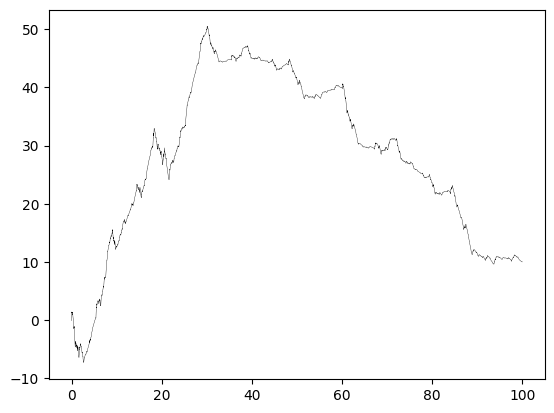

In [6]:
plt.plot(X1,Y1, c= "black", linewidth = 0.25)


#plt.scatter(x,y, marker = "o", c = "red")
plt.show
plt.savefig('interpolant.pdf')

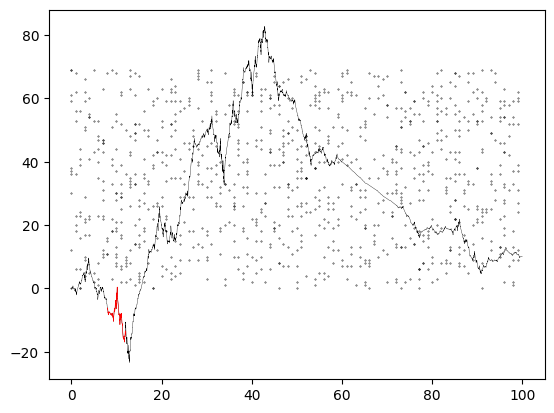

In [155]:
#make open ball function:

radius = 2
centre = 10

data = pd.DataFrame({"x": np.random.randint(low=0,high=100,size = 1000),
                    "y":np.random.randint(low=0,high=70,size = 1000)})
 
ball = df[(df.iloc[:,0] > centre - radius) & (df.iloc[:,0] < centre + radius)]

plt.plot(X1,Y1, c= "black", linewidth = 0.25)
plt.plot(ball.iloc[:,0],ball.iloc[:,1], c= "red", linewidth = 0.4)
plt.scatter(data.iloc[:,0],data.iloc[:,1],s=0.1,c="black")
plt.show
plt.savefig('interpolant.pdf')



In [160]:
## now for each data point (x,y), find the open ball of points on the attractor and calculate the distance between the two points. 
## take the sum of squares to find the distance between the data and the attractor.


x1,x2 = data.iloc[5]
radius = 0.01
print(x1)
ball = df[(df.iloc[:,0] > x1 - radius) & (df.iloc[:,0] < x1 + radius)]

dist = math.sqrt(max((x2-max(ball.iloc[:,1]))**2,(x2-min(ball.iloc[:,1]))**2))


dist1 = math.sqrt(max((x2-max(ball.iloc[:,1]))**2,(x2-min(ball.iloc[:,1]))**2))
dist2 = math.sqrt((max((x2-max(ball.iloc[:,1])),(x2-min(ball.iloc[:,1]))))**2)
print(dist1,dist2)



77


ValueError: max() arg is an empty sequence

In [161]:
## notes: smaller radius should improve search times, can also sample data points to get an estimate of the SSE. 
## if radius is too small it is increased to find a point in the attractor

def SSE(df,data,radius): # calculates the SSE between an attractor (df) and dataset (data)
    Listodist=0
    list = []
    for i in range(1,len(data)):
        x1,x2 = data.iloc[i]
        ball = df[(df.iloc[:,0] > x1 - radius) & (df.iloc[:,0] < x1 + radius)]
        if len(ball) > 0:
            dist = max((x2-max(ball.iloc[:,1]))**2,(x2-min(ball.iloc[:,1]))**2)
            Listodist = Listodist +dist
        else:
            ball2 = df[(df.iloc[:,0] > x1 - 2*radius) & (df.iloc[:,0] < x1 + 2*radius)]
            if len(ball2) >0:
                dist = max((x2-max(ball2.iloc[:,1]))**2,(x2-min(ball2.iloc[:,1]))**2)
                Listodist = Listodist +dist
            else:
                ball3 = df[(df.iloc[:,0] > x1 - 3*radius) & (df.iloc[:,0] < x1 + 3*radius)]
                if len(ball3) ==0:
                    Listodist = Listodist
                else:
                    dist = max((x2-max(ball3.iloc[:,1]))**2,(x2-min(ball3.iloc[:,1]))**2)
                    Listodist = Listodist +dist
            

    return Listodist

  
SSE(df,data,0.1)

## returns different values based on different radii (obviously), but generally going to be more accurate and faster when # points is increased when calculating the attractor.


972401.9721742532

In [1]:
## now to change the values of d to minimise the SSE:
## it may make more sense to set a roughness value calculated from the data itself and then use that to model. may reduce complexity
## could actually get an SSR value and then there would be an analogous r^2 value for the fractal interpolant(?)

mean = np.mean(data.iloc[:,1])
SST = np.sum(abs(data.iloc[:,1] - mean)**2)


    
print(SST)

def SSR(df,data,radius):
    mean = np.mean(data.iloc[:,1])
    for i in range(1,len(data)):
        ball = df[(df.iloc[:,0] > x1 - radius) & (df.iloc[:,0] < x1 + radius)]
        ssr =np.sum(abs(np.mean(ball)-mean)**2)
    
    return ssr


def Rsq(df,data,radius):
    ssr = SSR(df,data,radius)
    sst = ssr + SSE(df,data,radius)

    return (ssr/sst)/len(data)

Rsq(df,data,1)



NameError: name 'np' is not defined

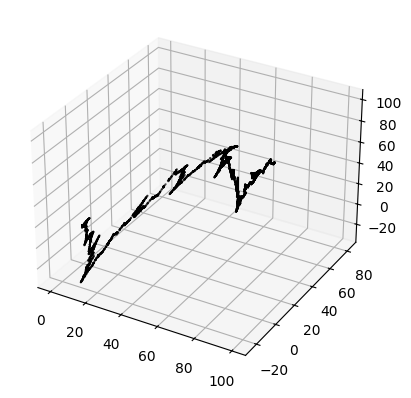

In [162]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, Y1, Z1, s=0.25, c = "black")
plt.show()